# Danni Fehr

## Research question/interests

I am interested in analyzing the effects of various personal attributes and health determinants on the cost of medical insurance. In particular, I would like to explore the following questions:

How does smoking affect a person's medical insurance charges?
How does region of residency affect a person's medical insurance charges?
How does smoking affect a person's BMI?

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
data = pd.read_csv("../data/raw/insurance.csv")

In [9]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Milestone 3

### Task 1: Exploratory Data Analysis (EDA)

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

It appears as though there are no duplicates or null values in the dataset.

<AxesSubplot:xlabel='region', ylabel='charges'>

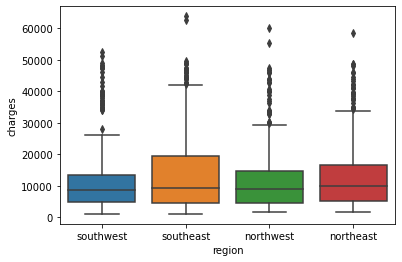

In [13]:
sns.boxplot(x="region",y="charges",data=data)

This boxplot shows that the charges are very comparable based on the region each patient was from. The means appear to be very similar with variations in upper quartiles and outliers. 

<AxesSubplot:xlabel='smoker', ylabel='charges'>

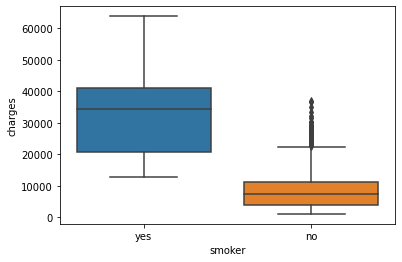

In [14]:
sns.boxplot(x="smoker",y="charges",data=data)

This boxplot shows that there is a notable difference in charges between smokers vs. nonsmokers. 

<AxesSubplot:xlabel='smoker', ylabel='bmi'>

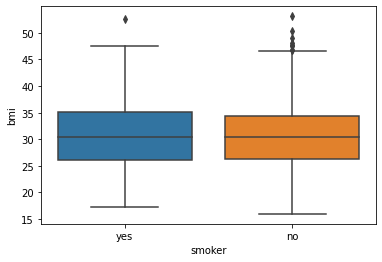

In [15]:
sns.boxplot(x="smoker",y="bmi",data=data)

This boxplot shows that BMI is very similar between smokers and non-smokers.

<AxesSubplot:xlabel='region', ylabel='Count'>

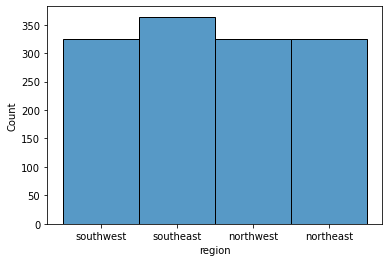

In [16]:
sns.histplot(x="region",data=data)

This histogram is a simple count of the patients from each region.

<AxesSubplot:xlabel='charges', ylabel='bmi'>

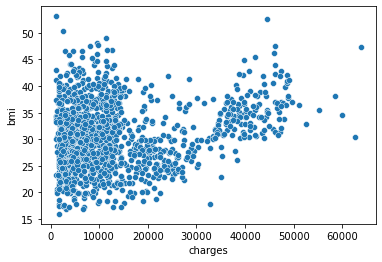

In [17]:
sns.scatterplot(x="charges",y="bmi", data=data)

This scatterplot shows a slightly positive trend towards a higher bmi being associated with higher charges but it does not appear to be a strong correlation.

# Task 2: Analysis Pipeline

### 1. Load Data

In [18]:
data = pd.read_csv("../data/raw/insurance.csv")

### 2. Clean Data

In [19]:
data = data.drop("children",axis=1)

In [20]:
data = data.drop("age",axis=1)

In [21]:
data = data.drop("sex",axis=1)

In [22]:
data

,bmi,smoker,region,charges
0,27.900,yes,southwest,16884.92400
1,33.770,no,southeast,1725.55230
2,33.000,no,southeast,4449.46200
3,22.705,no,northwest,21984.47061
4,28.880,no,northwest,3866.85520
...,...,...,...,...
1333,30.970,no,northwest,10600.54830
1334,31.920,no,northeast,2205.98080
1335,36.850,no,southeast,1629.83350
1336,25.800,no,southwest,2007.94500


The focus of my research questions are based around BMI, smoking, region and charges so I have removed the columns for sex, age and children.

### 3. Process Data

In [23]:
data["bmi"] = data["bmi"].round(0)
data["charges"] = data["charges"].round(2)
data

,bmi,smoker,region,charges
0,28.0,yes,southwest,16884.92
1,34.0,no,southeast,1725.55
2,33.0,no,southeast,4449.46
3,23.0,no,northwest,21984.47
4,29.0,no,northwest,3866.86
...,...,...,...,...
1333,31.0,no,northwest,10600.55
1334,32.0,no,northeast,2205.98
1335,37.0,no,southeast,1629.83
1336,26.0,no,southwest,2007.94


BMI values are typically rounded to the nearest integer value and charges are usually to 2 decimal points so I have made these changes to the dataframe.

In [24]:
data["northern"]=data["region"]

In [25]:
data["northern"]=data["northern"].str.contains("north")
data

,bmi,smoker,region,charges,northern
0,28.0,yes,southwest,16884.92,False
1,34.0,no,southeast,1725.55,False
2,33.0,no,southeast,4449.46,False
3,23.0,no,northwest,21984.47,True
4,29.0,no,northwest,3866.86,True
...,...,...,...,...,...
1333,31.0,no,northwest,10600.55,True
1334,32.0,no,northeast,2205.98,True
1335,37.0,no,southeast,1629.83,False
1336,26.0,no,southwest,2007.94,False


Creating of the "northern" column can allow for evaluations of how north vs. south are effected in terms of the other variables.

### 4. Wrangle Data


In [26]:
data = data[["charges", "bmi", "smoker","region","northern"]]

In [27]:
data

,charges,bmi,smoker,region,northern
0,16884.92,28.0,yes,southwest,False
1,1725.55,34.0,no,southeast,False
2,4449.46,33.0,no,southeast,False
3,21984.47,23.0,no,northwest,True
4,3866.86,29.0,no,northwest,True
...,...,...,...,...,...
1333,10600.55,31.0,no,northwest,True
1334,2205.98,32.0,no,northeast,True
1335,1629.83,37.0,no,southeast,False
1336,2007.94,26.0,no,southwest,False


Reordered the columns to feature charges and BMI first, followed by smoking and region.

# Task 3: Method Chaining

In [28]:
data1 = (
    pd.read_csv("../data/raw/insurance.csv")
        .drop("children",axis=1)
        .drop("age",axis=1)
        .drop("sex",axis=1)
)
data2 = (
    data1.assign(bmi=data["bmi"].round(0))
        .assign(charges=data["charges"].round(2))
        .assign(northern=data["region"].str.contains("north"))
)
data3 = data2[["charges", "bmi", "smoker","region","northern"]]
data3

,charges,bmi,smoker,region,northern
0,16884.92,28.0,yes,southwest,False
1,1725.55,34.0,no,southeast,False
2,4449.46,33.0,no,southeast,False
3,21984.47,23.0,no,northwest,True
4,3866.86,29.0,no,northwest,True
...,...,...,...,...,...
1333,10600.55,31.0,no,northwest,True
1334,2205.98,32.0,no,northeast,True
1335,1629.83,37.0,no,southeast,False
1336,2007.94,26.0,no,southwest,False


In [29]:
def load_and_process(url):
    data1 = (
        pd.read_csv(url)
            .drop("children",axis=1)
            .drop("age",axis=1)
            .drop("sex",axis=1)
    )
    data2 = (
        data1.assign(bmi=data["bmi"].round(0))
            .assign(charges=data["charges"].round(2))
            .assign(northern=data["region"].str.contains("north"))
    )
    data3 = data2[["charges", "bmi", "smoker","region","northern"]]
    return data3
load_and_process("../data/raw/insurance.csv")

,charges,bmi,smoker,region,northern
0,16884.92,28.0,yes,southwest,False
1,1725.55,34.0,no,southeast,False
2,4449.46,33.0,no,southeast,False
3,21984.47,23.0,no,northwest,True
4,3866.86,29.0,no,northwest,True
...,...,...,...,...,...
1333,10600.55,31.0,no,northwest,True
1334,2205.98,32.0,no,northeast,True
1335,1629.83,37.0,no,southeast,False
1336,2007.94,26.0,no,southwest,False


In [30]:
from project_functions1 import load_and_process

In [31]:
df = load_and_process("../data/raw/insurance.csv")
df

,charges,bmi,smoker,region,northern
0,16884.92,28.0,yes,southwest,False
1,1725.55,34.0,no,southeast,False
2,4449.46,33.0,no,southeast,False
3,21984.47,23.0,no,northwest,True
4,3866.86,29.0,no,northwest,True
...,...,...,...,...,...
1333,10600.55,31.0,no,northwest,True
1334,2205.98,32.0,no,northeast,True
1335,1629.83,37.0,no,southeast,False
1336,2007.94,26.0,no,southwest,False


# Task 4: Data Analysis

In [32]:
print("Number of rows and columns, respectively:", df.shape)
print("Columns titles in the dataset:", df.columns)

Number of rows and columns, respectively: (1338, 5)
Columns titles in the dataset: Index(['charges', 'bmi', 'smoker', 'region', 'northern'], dtype='object')


In [33]:
df.describe()

,charges,bmi
count,1338.000000,1338.000000
mean,13270.422280,30.663677
std,12110.011259,6.096007
min,1121.870000,16.000000
25%,4740.287500,26.000000
50%,9382.030000,30.000000
75%,16639.915000,35.000000
max,63770.430000,53.000000


### Analysis

There were 1338 patients included in this dataset comprised of Americans from 4 areas: Southwest, Southeast, Northwest and Northeast. The average medical insurance charge was $13,270.42 and the average bmi was 31.0 for all of the regions. Based on the graph analyses shown below, it appears as though smoking has a notable impact on a patient's medical insurance charges, whereas the region of residency does not notably impact the charge amounts. Although there were less non-smokers than smokers in the data set, the graphs below suggest that there is not a significant difference in BMI between smokers and non-smokers.

### Comparison of Smoking vs Non-Smoking on Medical Insurance Charges

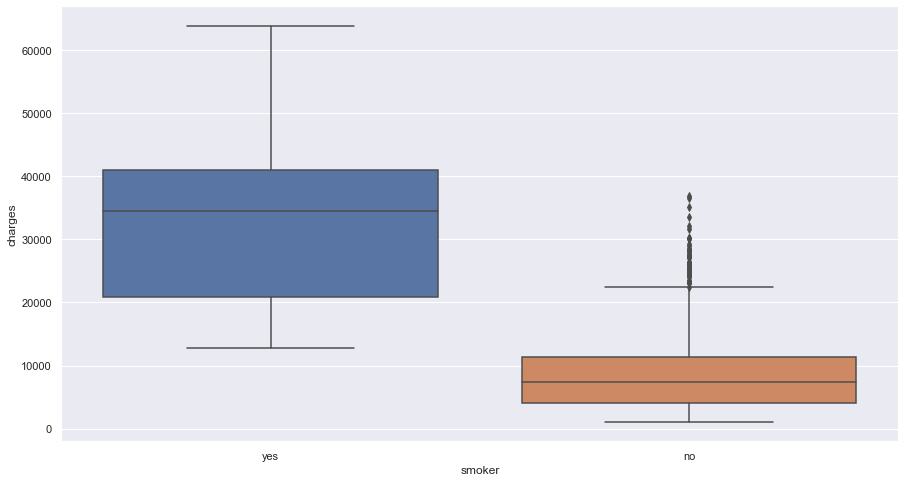

In [65]:
sns.boxplot(x="smoker",y="charges",data=df)
sns.set(rc = {'figure.figsize':(12,8)})

### Graph Analysis: 
The boxplot above shows that the effects of smoking cause a notable increase for medical insurance charges compared to patients who do not smoke. Although there are significantly more outliers within the non-smoking group, the most extreme value is still only barely above the mean value of the smoking group. This suggests that smoking could have financial implications as far as medical insurance costs go.

### Comparison of Region of Residency on Medical Insurance Charges

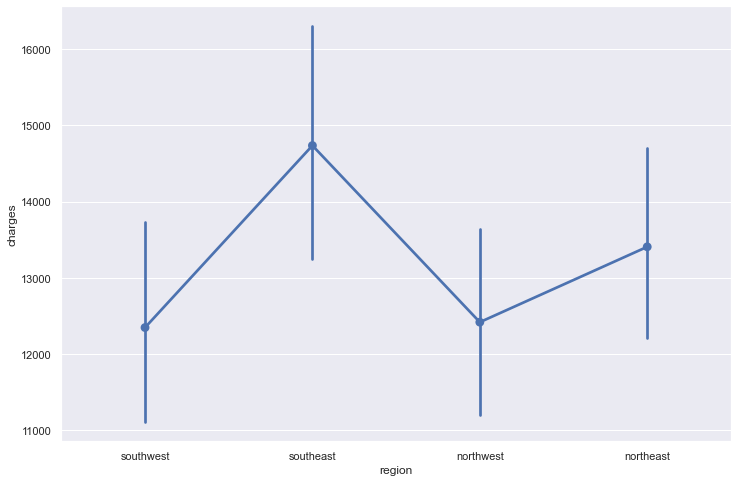

In [86]:
sns.pointplot(x="region",y="charges",data=data)
sns.set(rc = {'figure.figsize':(12,8)})

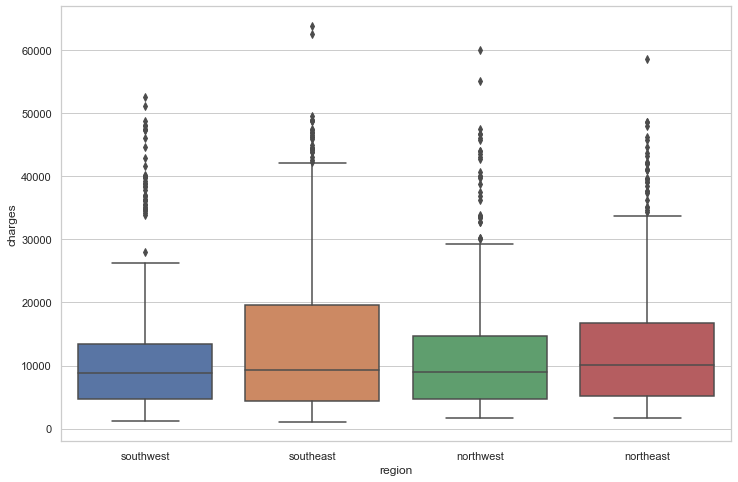

In [90]:
sns.set_theme(style="whitegrid")

sns.boxplot(x="region",y="charges",data=df)

sns.set(rc = {'figure.figsize':(12,8)})

### Graph Analyses:
The line plot (upper figure) is a useful graph in comparing the medical insurance charges of each of the regions, where as the box plot (lower figure) is a clearer comparison of the outliers for medical insurance charge values of each region. These visualizations suggest that residents of the southeast experience a slightly higher cost of medical insurance charges compared to the means of the other regions. The southeast also contains the highest upper quartile and outlier values.

### Effects of Northern vs Southern Residency on Charges

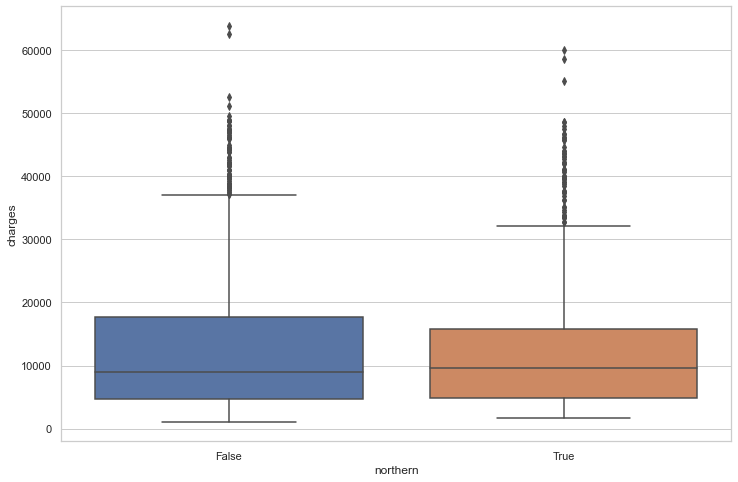

In [80]:
sns.set_theme(style="whitegrid")

sns.boxplot(x="northern", y="charges", data=df)
sns.set(rc = {'figure.figsize':(12,8)})

### Graph Analysis:
The graph above shows a wider comparison of residents of the north (northeast and northwest) vs the south (southeast and southwest) in terms of their medical insurance charges. The "True" axis label pertains to residents from the northern regions and the "False" axis pertains to residents of the south. The graph shows that there is not a notable difference in charges based on northern vs southern residency. Northern residents had only a slightly higher mean charge value whereas southern residents had higher outliers. 

### Comparison of Smoking vs Non-smoking and effects on BMI

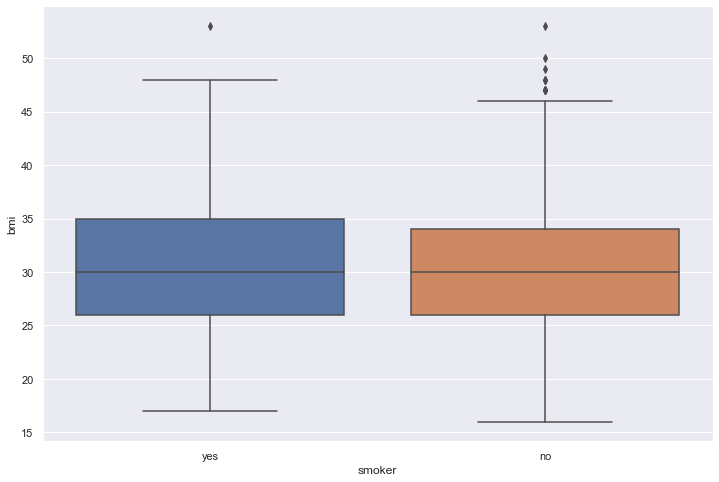

In [68]:
ax = sns.boxplot(x="smoker",y="bmi",data=df)
sns.set(rc = {'figure.figsize':(12,8)})

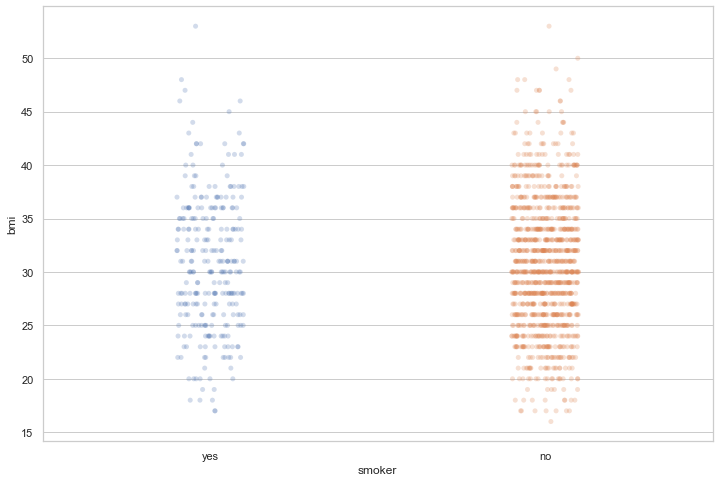

In [81]:
sns.set_theme(style="whitegrid")

sns.stripplot(x="smoker", y="bmi",
              data=df, dodge=True, alpha=.25, zorder=1)
sns.set(rc = {'figure.figsize':(12,8)})

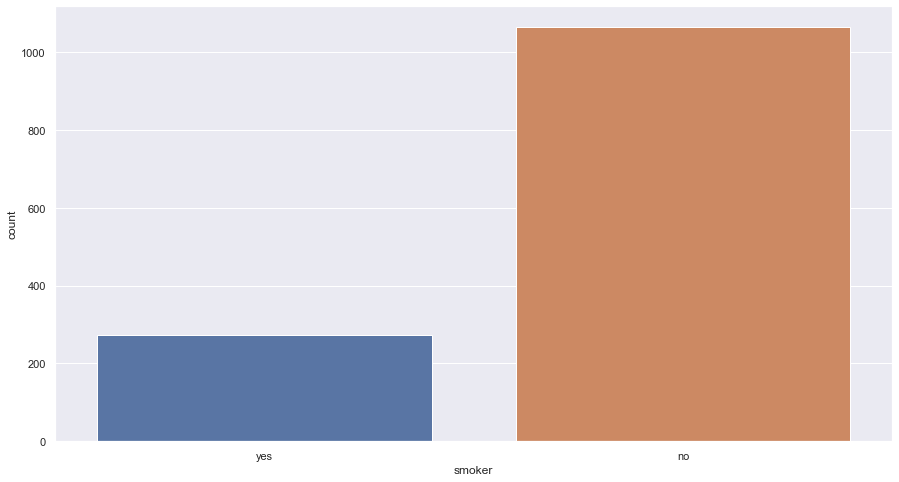

In [71]:
sns.countplot(x=df["smoker"])
sns.set(rc = {'figure.figsize':(12,8)})

### Graph Analyses:
The box plot (upper figure) and strip plot (middle figure) comparing the BMI of patients who smoke vs those who do not suggest that smoking does not effect a person's BMI notably. The means and quartile values are comparable in the boxplot, although the smoking category had a slightly higher upper quartile and less outliers. The strip plot displays a similar trend although we are able to tell that there are more people who do not smoke based on the higher dot count. The count plot (lower figure) confirms this as there are significantly more non-smokers compared to smokers.